<a href="https://colab.research.google.com/github/Maheshcheegiti/dwdm-lab/blob/main/DWDM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# connecting to google drive for datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Experiment that demonstrating dealing with categorical data, scaling the features, and splitting the dataset into training and testing sets using Python libraries:
>Dataset: "Breast Cancer Wisconsin" dataset from Scikit-learn library

>Step 1: Loading the dataset to load the Breast Cancer Wisconsin dataset, we first need to import the required libraries and load the dataset as follows:


In [ ]:
import pandas as pd

# load the dataset
cancer = pd.read_csv("/content/drive/MyDrive/datasets-master/BreastCancer.csv")

# convert it into a pandas dataframe
data = pd.DataFrame(cancer)

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


>Step 2: Dealing with categorical data in this dataset

>Target column which is 'diagnosis' also a categorical data other than that there are no categorical variables. However, we can simulate a categorical variable by converting one of the numeric variables into categories using the cut() function as follows:

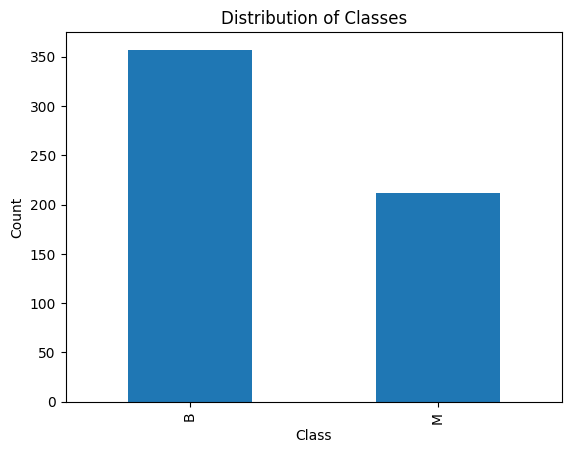

In [ ]:
import matplotlib.pyplot as plt

categorical1 = data['diagnosis']  # malignant[M] (cancerous) or benign[B] (non-cancerous)

# Create a bar plot
categorical1.value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

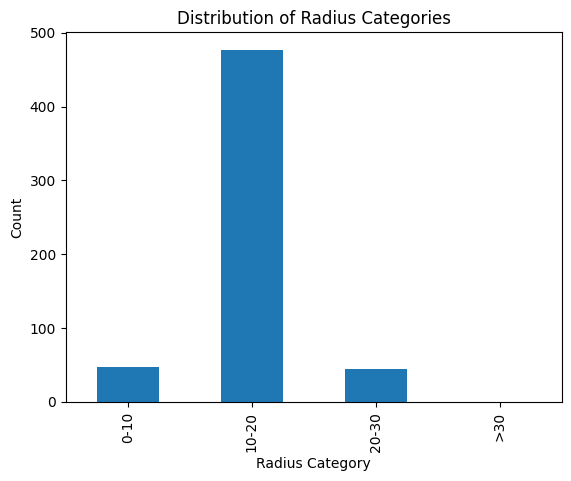

In [ ]:
import pandas as pd
import numpy as np

# create a categorical variable by binning 'radius_mean'
bins = [0, 10, 20, 30, np.inf]
labels = ['0-10', '10-20', '20-30', '>30']

data['radius_category'] = pd.cut(data['radius_mean'], bins=bins, labels=labels)

#'radius_category' is the categorical variable you created
data['radius_category'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Radius Categories')
plt.xlabel('Radius Category')
plt.ylabel('Count')
plt.show()


>Here, we have created four categories based on the range of values in the 'mean radius' variable.


>Step 3: Scaling the features
we need to scale the features so that they have the same range of values. We can do this using the Standardscaler() function from the Scikit-learn library as follows:

In [ ]:
from sklearn.preprocessing import StandardScaler

# create instance
scaler = StandardScaler()

# fit and transform on independent variables
independent = data.drop(['diagnosis','radius_category'], axis = 1)
independent = scaler.fit_transform(independent)

# target
target = data['diagnosis']

>Step 4: Splitting the dataset into training and testing sets
Finally, we need to split the dataset into training and testing sets so that we can evaluate the performance of our model. We can do this using the train_test_split() function from the Scikit-learn library as follows:


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, target, test_size=0.3, random_state=42)

###Output:
>Here, we have split the dataset into 70% training data and 30% testing data, and set the random_state
parameter to ensure that the split is reproducible. We have also assigned the independent and target variables to X_train, X_test, y_train, and y_test variables, which we can use to train and evaluate our model
